# LinearRegression
### To assess dependency of salary on years of experience of working professionals.Dataset is sourced from kaggle.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [20]:
!pip install -U scikit-learn

   ---------------------------------------- 0.0/9.3 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.3 MB ? eta -:--:--
   ------- -------------------------------- 1.8/9.3 MB 5.0 MB/s eta 0:00:02
   ------------ --------------------------- 2.9/9.3 MB 4.5 MB/s eta 0:00:02
   ---------------- ----------------------- 3.9/9.3 MB 4.4 MB/s eta 0:00:02
   -------------------- ------------------- 4.7/9.3 MB 4.3 MB/s eta 0:00:02
   ----------------------- ---------------- 5.5/9.3 MB 4.2 MB/s eta 0:00:01
   --------------------------- ------------ 6.3/9.3 MB 4.1 MB/s eta 0:00:01
   ------------------------------ --------- 7.1/9.3 MB 4.1 MB/s eta 0:00:01
   --------------------------------- ------ 7.9/9.3 MB 4.1 MB/s eta 0:00:01
   -------------------------------------- - 8.9/9.3 MB 4.0 MB/s eta 0:00:01
   ---------------------------------------  9.2/9.3 MB 4.0 MB/s eta 0:00:01
   ---------------------------------------- 9.3/9.3 MB 3.6 MB/s eta 0:00:00
   -----------------------


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
!pip install openpyxl


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
df=pd.read_excel("Salary.xlsx")
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.2,39891
4,2.9,56642


Text(0, 0.5, 'salary')

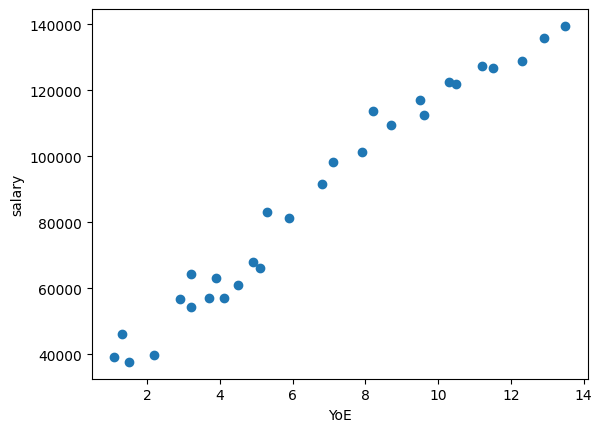

In [12]:
plt.scatter(df['YearsExperience'],df['Salary'])
plt.xlabel('YoE')
plt.ylabel('salary')

## Splitting data into input and ouput variable

In [14]:
X=df.iloc[:,0:1]

In [15]:
y=df.iloc[:,-1]

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4)

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
lr=LinearRegression()

In [26]:
lr.fit(X_train,y_train)

LinearRegression()

In [27]:
X_test

,YearsExperience
15,6.8
11,4.9
5,3.2
4,2.9
0,1.1
20,9.5
28,13.5
26,12.3
22,10.3
19,8.7


In [28]:
y_test

15     91738
11     67938
5      54445
4      56642
0      39343
20    116969
28    139465
26    128765
22    122391
19    109431
13     83088
24    127345
Name: Salary, dtype: int64

## Predicting

In [33]:
lr.predict(X_test.iloc[2].values.reshape(1,1))

c:\python\python38\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([55909.68057581])

## Calculating Metrics

In [34]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [44]:
y_pred=lr.predict(X_test)

In [40]:
y_test.values

array([ 91738,  67938,  54445,  56642,  39343, 116969, 139465, 128765,
       122391, 109431,  83088, 127345], dtype=int64)

In [46]:
print("MAE",mean_absolute_error(y_test,y_pred))

MAE 4297.975374589193


In [47]:
print("MSE",mean_squared_error(y_test,y_pred))

MSE 25383446.648344327


In [48]:
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE 5038.1987503813625


In [50]:
print("R2score",r2_score(y_test,y_pred))
r2=r2_score(y_test,y_pred)

R2score 0.9760207502693964


In [54]:
#Adjusted R2score
1-((1-r2)*(12-1)/(12-1-1))


0.973622825296336

## Conclusion-Our model is quite accurate as it is able to explain 97.3% variance in salary due to Years of experience.